In [1]:
from math import factorial as fact


n = 5
p = 0.7
print(f'{sum([fact(n) / (fact(i) * fact(n - i)) * p ** i * (1 - p) ** (n - i) * 100 for i in range(n // 2 + 1, n + 1)]):.1f}%')

83.7%


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

In [4]:
def fill_nan(table):
    for col in table.columns:
        table[col] = table[col].fillna(table[col].median())
    return table

In [5]:
data = pd.read_csv('Downloads/credit_scoring_sample.csv')
data.head()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45063 entries, 0 to 45062
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      45063 non-null  int64  
 1   age                                   45063 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  45063 non-null  int64  
 3   DebtRatio                             45063 non-null  float64
 4   NumberOfTimes90DaysLate               45063 non-null  int64  
 5   NumberOfTime60-89DaysPastDueNotWorse  45063 non-null  int64  
 6   MonthlyIncome                         36420 non-null  float64
 7   NumberOfDependents                    43946 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 2.8 MB


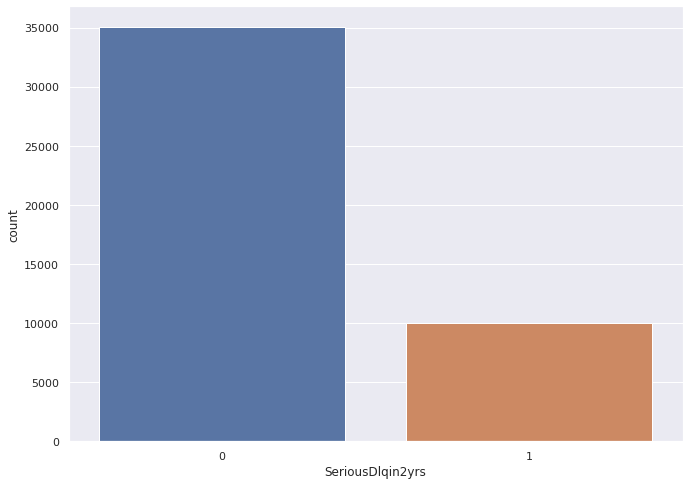

In [7]:
sns.countplot(data['SeriousDlqin2yrs']);

In [8]:
data['SeriousDlqin2yrs'].value_counts(normalize=True)

0    0.777511
1    0.222489
Name: SeriousDlqin2yrs, dtype: float64

In [9]:
independent_columns_names = [x for x in data if x != 'SeriousDlqin2yrs']
independent_columns_names

['age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'MonthlyIncome',
 'NumberOfDependents']

In [10]:
table = fill_nan(data)

In [11]:
X = table[independent_columns_names]
y = table['SeriousDlqin2yrs']

In [12]:
delayed = table[y == 1]

In [13]:
np.random.seed(0)
n = delayed.shape[0]
bsample = np.random.choice(delayed['age'], size=(1000, n), replace=True).mean(axis=1)
print(f'Interval: [{np.quantile(bsample, 0.05):.2f} {np.quantile(bsample, 0.95):.2f}]')

Interval: [45.71 46.13]


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [15]:
lr = LogisticRegression(random_state=5,
                        class_weight='balanced')

In [16]:
parameters = {'C': np.logspace(-4, 1, 6)}

In [17]:
skf = StratifiedKFold(n_splits=5, shuffle=True,
                      random_state=5)

In [18]:
from sklearn.metrics import roc_auc_score

In [19]:
gs = GridSearchCV(lr, parameters,
                  cv=skf, n_jobs=-1,
                  scoring='roc_auc')
gs.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=5),
             n_jobs=-1,
             param_grid={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])},
             scoring='roc_auc')

In [20]:
gs.best_params_, gs.best_score_

({'C': 0.001}, 0.8089120626797153)

In [21]:
gs.cv_results_

{'mean_fit_time': array([0.63287492, 0.57914453, 0.68317304, 0.79910665, 0.81685681,
        0.52073812]),
 'std_fit_time': array([0.13125889, 0.13176851, 0.21860406, 0.16395566, 0.17557911,
        0.14494371]),
 'mean_score_time': array([0.01312919, 0.00971541, 0.01064396, 0.00979662, 0.00698442,
        0.00486946]),
 'std_score_time': array([0.00849921, 0.00034557, 0.00122836, 0.00031695, 0.00208316,
        0.00086772]),
 'param_C': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.0001},
  {'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1.0},
  {'C': 10.0}],
 'split0_test_score': array([0.77984662, 0.80917719, 0.80929853, 0.79170083, 0.78384333,
        0.79174075]),
 'split1_test_score': array([0.78759234, 0.8179555 , 0.79432145, 0.79394931, 0.79287579,
        0.80496031]),
 'split2_test_score': array([0.78635422, 0.79530418, 0.7982127

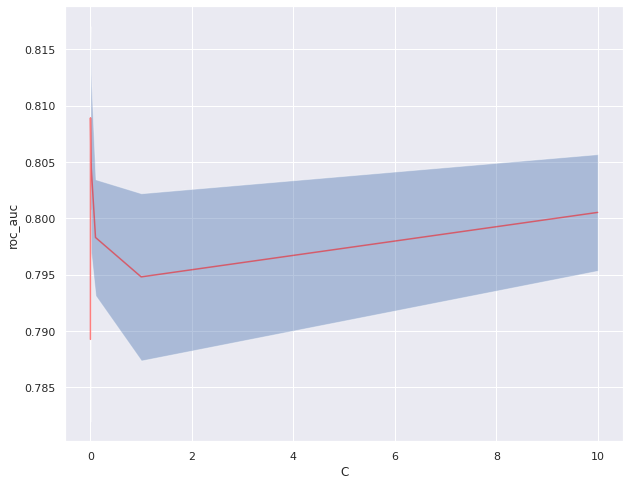

In [22]:
mean_test_score = gs.cv_results_['mean_test_score']
std_test_score = gs.cv_results_['std_test_score']
params = np.array(list(parameters.values()))[0]
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(params, mean_test_score, 
        alpha=0.5, color='red')
ax.fill_between(params,
                mean_test_score - std_test_score,
                mean_test_score + std_test_score,
                alpha=0.4)
ax.set_xlabel('C')
ax.set_ylabel('roc_auc');

In [23]:
print(f'Standart deviation is less than {max(std_test_score) * 100:.2f}%')

Standart deviation is less than 0.81%


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
ss = StandardScaler()
lr.fit(ss.fit_transform(X), y)

LogisticRegression(class_weight='balanced', random_state=5)

In [26]:
import eli5


logit = LogisticRegression(C=0.001, random_state=5,
                           class_weight='balanced')
logit.fit(X, y)
eli5.explain_weights(logit, feature_names=independent_columns_names, feature_filter=lambda x: x!= '<BIAS>')

Weight?,Feature
+0.447,NumberOfTime30-59DaysPastDueNotWorse
+0.390,NumberOfTimes90DaysLate
+0.216,NumberOfTime60-89DaysPastDueNotWorse
+0.192,NumberOfDependents
-0.000,DebtRatio
-0.000,MonthlyIncome
-0.014,age


In [27]:
print((np.exp(logit.coef_[0]) / np.sum(np.exp(logit.coef_[0])))[2])

0.11792659197566578


In [28]:
lr = LogisticRegression(C=0.001, random_state=5,
                        class_weight='balanced')
lr.fit(X, y)

LogisticRegression(C=0.001, class_weight='balanced', random_state=5)

In [29]:
eli5.explain_weights(lr, feature_names=independent_columns_names)

Weight?,Feature
+0.447,NumberOfTime30-59DaysPastDueNotWorse
+0.390,NumberOfTimes90DaysLate
+0.216,NumberOfTime60-89DaysPastDueNotWorse
+0.192,NumberOfDependents
+0.119,<BIAS>
-0.000,DebtRatio
-0.000,MonthlyIncome
-0.014,age


In [30]:
np.exp(lr.coef_[0][0] * 20)

0.7610093375740543

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier(n_estimators=100,
                            n_jobs=-1,
                            random_state=42,
                            class_weight='balanced')

In [33]:
parameters = {'max_features': [1, 2, 4],
              'min_samples_leaf': [3, 5, 7, 9],
              'max_depth': [5, 10, 15]}

In [34]:
gsr = GridSearchCV(rf, parameters, cv=skf,
                   n_jobs=-1, scoring='roc_auc')
gsr.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': [1, 2, 4],
                         'min_samples_leaf': [3, 5, 7, 9]},
             scoring='roc_auc')

In [35]:
gsr.best_params_, gsr.best_score_

({'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 9},
 0.8357327333345677)

In [36]:
print(f'{(gsr.best_score_ - gs.best_score_) * 100:.0f}%')

3%


In [38]:
brf = RandomForestClassifier(n_estimators=100,
                             max_features=4,
                             min_samples_leaf=9,
                             max_depth=10)

brf.fit(X, y)

RandomForestClassifier(max_depth=10, max_features=4, min_samples_leaf=9)

In [39]:
eli5.show_weights(brf, feature_names=independent_columns_names)

Weight,Feature
0.4147 ± 0.2117,NumberOfTimes90DaysLate
0.2428 ± 0.1940,NumberOfTime30-59DaysPastDueNotWorse
0.1197 ± 0.1331,NumberOfTime60-89DaysPastDueNotWorse
0.0791 ± 0.0152,DebtRatio
0.0724 ± 0.0261,age
0.0580 ± 0.0120,MonthlyIncome
0.0133 ± 0.0058,NumberOfDependents


In [40]:
print(*sorted(zip(independent_columns_names, brf.feature_importances_), key=lambda x: -x[1]))

('NumberOfTimes90DaysLate', 0.4147106983347852) ('NumberOfTime30-59DaysPastDueNotWorse', 0.2427727726187409) ('NumberOfTime60-89DaysPastDueNotWorse', 0.119666274603401) ('DebtRatio', 0.0791264347845161) ('age', 0.0724032111195666) ('MonthlyIncome', 0.058004623063167296) ('NumberOfDependents', 0.013315985475822854)


In [41]:
# Logistic Regression has a better
# feature interpretability than RF

In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import (cross_val_score,
                                     RandomizedSearchCV)

parameters = {'max_features': [2, 3, 4],
              'max_samples': [0.5, 0.7, 0.9],
              'base_estimator__C': np.logspace(-4, 2, 7)}

In [43]:
bc = BaggingClassifier(LogisticRegression(class_weight='balanced'),
                      n_estimators=100,
                      n_jobs=-1, random_state=42)
rgsb = RandomizedSearchCV(bc, parameters,
                          n_iter=20,
                          cv=skf, n_jobs=-1,
                          scoring='roc_auc',
                          random_state=1,
                          verbose=True)
rgsb.fit(table[independent_columns_names], y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
                   estimator=BaggingClassifier(base_estimator=LogisticRegression(class_weight='balanced'),
                                               n_estimators=100, n_jobs=-1,
                                               random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'base_estimator__C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                                        'max_features': [2, 3, 4],
                                        'max_samples': [0.5, 0.7, 0.9]},
                   random_state=1, scoring='roc_auc', verbose=True)

In [44]:
rgsb.best_params_, rgsb.best_score_

({'max_samples': 0.9, 'max_features': 2, 'base_estimator__C': 100.0},
 0.8087951623513827)

In [45]:
print(f'{rgsb.best_score_ * 100:.2f}%')

80.88%
